Following results are from these parameters:
```
arch_dict = {'n_layers': 2,
 'n_hidden': 128,
 'n_latent_shared': 32,
 'n_latent_attribute': 32,
 'dropout_rate': 0.1,
 'weighted_classifier': True,
}
train_dict = {
 'max_epochs': 1000,
 'batch_size': 256,
 'recon_weight': 20,
 'cf_weight': 0.8,
 'beta': 0.003,
 'clf_weight': 0.05,
 'adv_clf_weight': 0.014,
 'adv_period': 5,
 'n_cf': 1,
 'early_stopping_patience': 6,
 'early_stopping': True,
 'save_best': True,
 'kappa_optimizer2': False,
 'n_epochs_pretrain_ae': 0,
}

plan_kwargs = {
 'lr': 0.003,
 'weight_decay': 0.00005,
 'new_cf_method': True,
 'lr_patience': 5,
 'lr_factor': 0.5,
 'lr_scheduler_metric': 'loss_validation',
 'n_epochs_kl_warmup': 10,
}
```

31 August 2024

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [18]:
csv_path = '/lustre/scratch126/cellgen/team205/aa34/Arian/Dis2P/dis2p_reproducibility_clean/reproduce_benchmarks/kang/cf_results/'
split_results = {}
for file in os.listdir(csv_path):
    if file.endswith('delta_pearson.csv'):
        split = file.split('_')[1]
        split_results[split] = pd.read_csv(csv_path + file, index_col=0)
        split_results[split]['Split'] = split
        split_results[split]['Genes'] = split_results[split].index
        split_results[split]['Metric'] = 'Delta Pearson'

df_concat_delta = pd.concat(split_results.values())
split_results.keys()

dict_keys(['DC', 'NK', 'B', 'CD16 Mono', 'T', 'CD4 T', 'CD14 Mono', 'CD8 T'])

In [19]:
csv_path = '/lustre/scratch126/cellgen/team205/aa34/Arian/Dis2P/dis2p_reproducibility_clean/reproduce_benchmarks/kang/cf_results/'
split_results = {}
for file in os.listdir(csv_path):
    if file.endswith('pearson.csv') and 'delta' not in file:
        split = file.split('_')[1]
        split_results[split] = pd.read_csv(csv_path + file, index_col=0)
        split_results[split]['Split'] = split
        split_results[split]['Genes'] = split_results[split].index
        split_results[split]['Metric'] = 'Pearson'

df_concat_pearson = pd.concat(split_results.values())
split_results.keys()

dict_keys(['NK', 'CD14 Mono', 'B', 'CD16 Mono', 'CD4 T', 'T', 'DC', 'CD8 T'])

In [20]:
csv_path = '/lustre/scratch126/cellgen/team205/aa34/Arian/Dis2P/dis2p_reproducibility_clean/reproduce_benchmarks/kang/cf_results/'
split_results = {}
for file in os.listdir(csv_path):
    if file.endswith('emd.csv'):
        split = file.split('_')[1]
        split_results[split] = pd.read_csv(csv_path + file, index_col=0)
        split_results[split]['Split'] = split
        split_results[split]['Genes'] = split_results[split].index
        split_results[split]['Metric'] = 'EMD'
        
df_concat_emd = pd.concat(split_results.values())
split_results.keys()

dict_keys(['CD16 Mono', 'CD14 Mono', 'CD8 T', 'NK', 'B', 'DC', 'CD4 T', 'T'])

In [21]:
df_concat = pd.concat([df_concat_pearson, df_concat_delta, df_concat_emd])
df_concat.head()

,Dis2P,Biolord,scdisinfact,Control,Dis2P_var,Biolord_var,scdisinfact_var,Control_var,Split,Genes,Metric
20,0.919130,0.589087,0.944915,0.769939,0.468120,0.287235,0.248572,0.281530,NK,20,Pearson
all,0.832791,0.633503,0.943501,0.818049,0.717266,0.533712,0.657490,0.889433,NK,all,Pearson
20,0.936352,0.850008,0.881522,0.703753,0.460582,0.108335,0.374935,0.039218,CD14 Mono,20,Pearson
all,0.926180,0.778225,0.889866,0.754107,0.740054,0.585385,0.501569,0.657917,CD14 Mono,all,Pearson
20,0.954778,0.778452,0.911940,0.795649,0.645420,0.680718,0.478843,0.129873,B,20,Pearson


In [22]:
df_concat

,Dis2P,Biolord,scdisinfact,Control,Dis2P_var,Biolord_var,scdisinfact_var,Control_var,Split,Genes,Metric
20,0.919130,0.589087,0.944915,0.769939,0.468120,0.287235,0.248572,0.281530,NK,20,Pearson
all,0.832791,0.633503,0.943501,0.818049,0.717266,0.533712,0.657490,0.889433,NK,all,Pearson
20,0.936352,0.850008,0.881522,0.703753,0.460582,0.108335,0.374935,0.039218,CD14 Mono,20,Pearson
all,0.926180,0.778225,0.889866,0.754107,0.740054,0.585385,0.501569,0.657917,CD14 Mono,all,Pearson
20,0.954778,0.778452,0.911940,0.795649,0.645420,0.680718,0.478843,0.129873,B,20,Pearson
all,0.873960,0.754909,0.938604,0.805152,0.780229,0.680030,0.599881,0.813979,B,all,Pearson
20,0.886119,0.956977,0.908134,0.913916,0.650548,0.270665,0.572308,0.315113,CD16 Mono,20,Pearson
all,0.914292,0.901075,0.892888,0.820359,0.767921,0.755017,0.566718,0.802407,CD16 Mono,all,Pearson
20,0.973892,0.684474,0.962013,0.807627,0.654706,0.411164,0.444440,0.529491,CD4 T,20,Pearson
all,0.903539,0.804934,0.957994,0.810065,0.797808,0.688466,0.656478,0.884558,CD4 T,all,Pearson


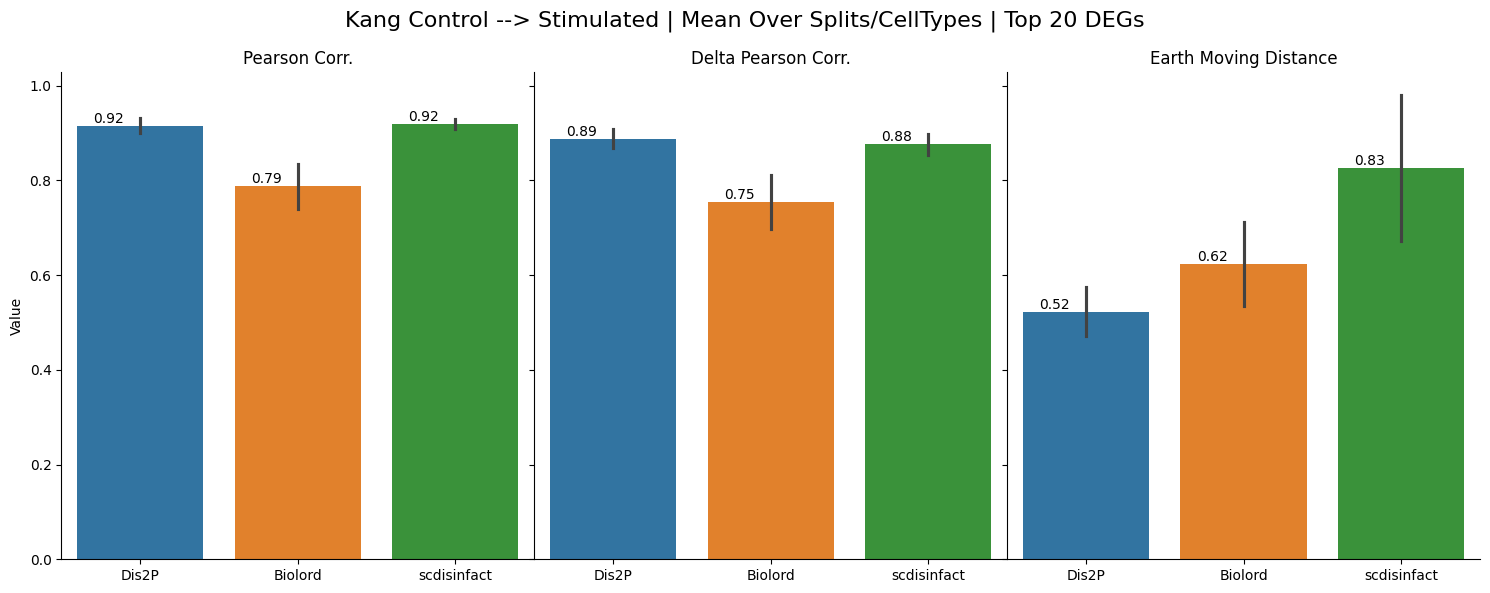

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

GENES = '20'

df_ax = df_concat[(df_concat['Genes'] == GENES) & (df_concat['Metric'] == 'Pearson')]
sns.barplot(df_ax[['Dis2P', 'Biolord', 'scdisinfact']], ax=axes[0], errorbar='se')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(
        p.get_x() + p.get_width() / 2 -0.2,  # x coordinate of the text
        height,  # y coordinate of the text
        f'{height:.2f}',  # text to be displayed
        ha='center',  # horizontal alignment
        va='bottom'  # vertical alignment
    )
axes[0].set_title('Pearson Corr.')

df_ax = df_concat[(df_concat['Genes'] == GENES) & (df_concat['Metric'] == 'Delta Pearson')]
sns.barplot(df_ax[['Dis2P', 'Biolord', 'scdisinfact']], ax=axes[1], errorbar='se')
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(
        p.get_x() + p.get_width() / 2 -0.2,  # x coordinate of the text
        height,  # y coordinate of the text
        f'{height:.2f}',  # text to be displayed
        ha='center',  # horizontal alignment
        va='bottom'  # vertical alignment
    )
axes[1].set_title('Delta Pearson Corr.')

df_ax = df_concat[(df_concat['Genes'] == GENES) & (df_concat['Metric'] == 'EMD')]
sns.barplot(df_ax[['Dis2P', 'Biolord', 'scdisinfact']], ax=axes[2], errorbar='se')
for p in axes[2].patches:
    height = p.get_height()
    axes[2].text(
        p.get_x() + p.get_width() / 2 -0.2,  # x coordinate of the text
        height,  # y coordinate of the text
        f'{height:.2f}',  # text to be displayed
        ha='center',  # horizontal alignment
        va='bottom'  # vertical alignment
    )
axes[2].set_title('Earth Moving Distance')

# Adding labels and legend
axes[0].set_ylabel('Value')
# axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['right', 'top']].set_visible(False)
axes[2].spines[['right', 'top']].set_visible(False)

fig.suptitle('Kang Control --> Stimulated | Mean Over Splits/CellTypes | Top 20 DEGs', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)

plt.show()


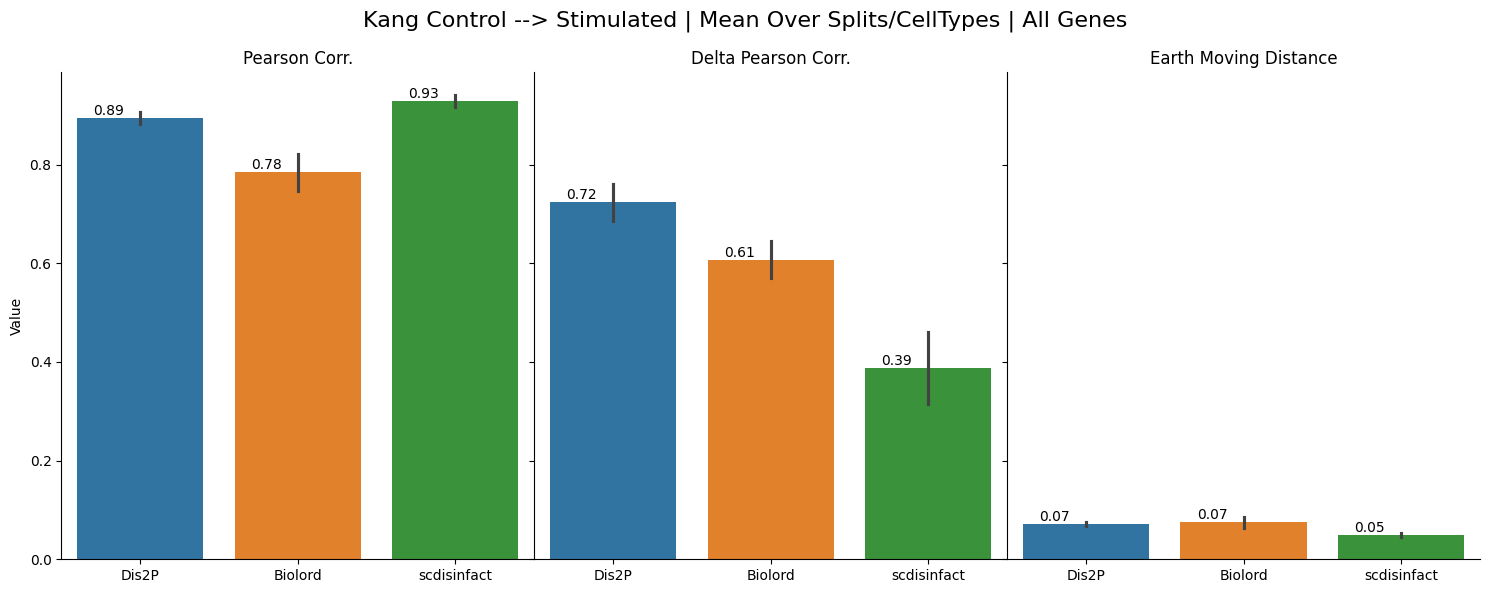

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

GENES = 'all'

df_ax = df_concat[(df_concat['Genes'] == GENES) & (df_concat['Metric'] == 'Pearson')]
sns.barplot(df_ax[['Dis2P', 'Biolord', 'scdisinfact']], ax=axes[0], errorbar='se')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(
        p.get_x() + p.get_width() / 2 -0.2,  # x coordinate of the text
        height,  # y coordinate of the text
        f'{height:.2f}',  # text to be displayed
        ha='center',  # horizontal alignment
        va='bottom'  # vertical alignment
    )
axes[0].set_title('Pearson Corr.')

df_ax = df_concat[(df_concat['Genes'] == GENES) & (df_concat['Metric'] == 'Delta Pearson')]
sns.barplot(df_ax[['Dis2P', 'Biolord', 'scdisinfact']], ax=axes[1], errorbar='se')
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(
        p.get_x() + p.get_width() / 2 -0.2,  # x coordinate of the text
        height,  # y coordinate of the text
        f'{height:.2f}',  # text to be displayed
        ha='center',  # horizontal alignment
        va='bottom'  # vertical alignment
    )
axes[1].set_title('Delta Pearson Corr.')

df_ax = df_concat[(df_concat['Genes'] == GENES) & (df_concat['Metric'] == 'EMD')]
sns.barplot(df_ax[['Dis2P', 'Biolord', 'scdisinfact']], ax=axes[2], errorbar='se')
for p in axes[2].patches:
    height = p.get_height()
    axes[2].text(
        p.get_x() + p.get_width() / 2 -0.2,  # x coordinate of the text
        height,  # y coordinate of the text
        f'{height:.2f}',  # text to be displayed
        ha='center',  # horizontal alignment
        va='bottom'  # vertical alignment
    )
axes[2].set_title('Earth Moving Distance')

# Adding labels and legend
axes[0].set_ylabel('Value')
# axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['right', 'top']].set_visible(False)
axes[2].spines[['right', 'top']].set_visible(False)

fig.suptitle('Kang Control --> Stimulated | Mean Over Splits/CellTypes | All Genes', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)

plt.show()


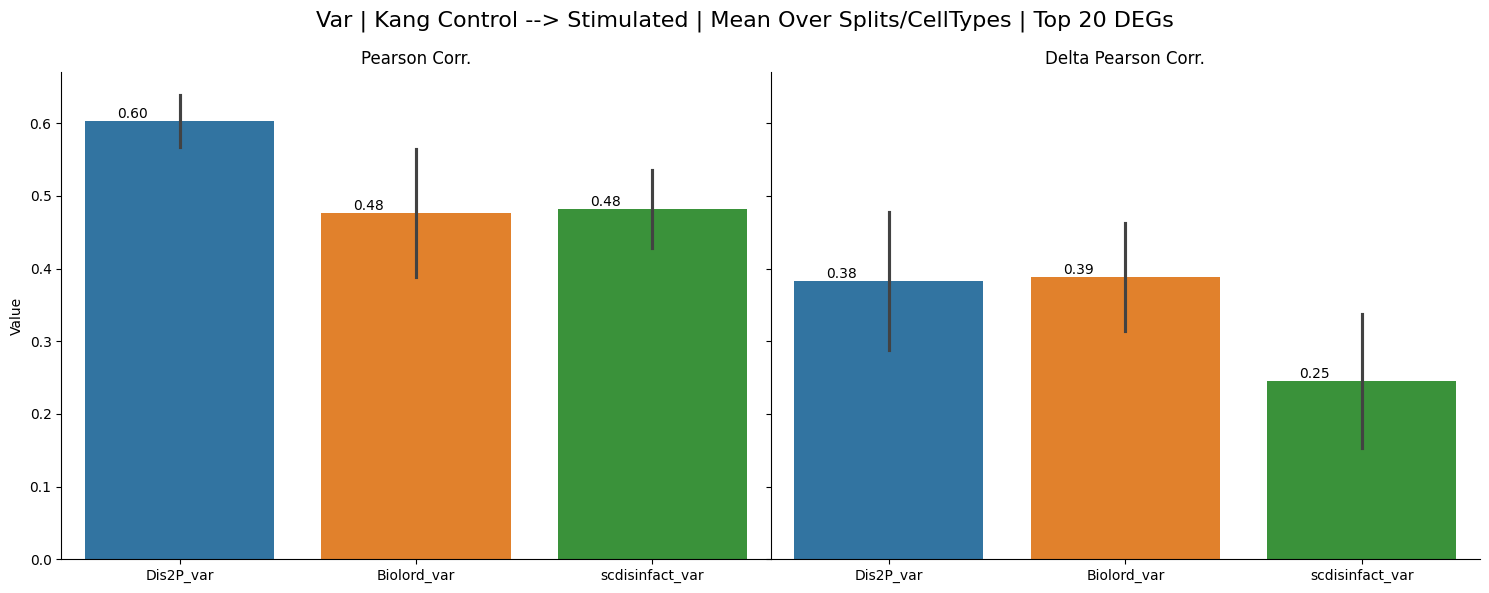

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

GENES = '20'

df_ax = df_concat[(df_concat['Genes'] == GENES) & (df_concat['Metric'] == 'Pearson')]
sns.barplot(df_ax[['Dis2P_var', 'Biolord_var', 'scdisinfact_var']], ax=axes[0], errorbar='se')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(
        p.get_x() + p.get_width() / 2 -0.2,  # x coordinate of the text
        height,  # y coordinate of the text
        f'{height:.2f}',  # text to be displayed
        ha='center',  # horizontal alignment
        va='bottom'  # vertical alignment
    )
axes[0].set_title('Pearson Corr.')

df_ax = df_concat[(df_concat['Genes'] == GENES) & (df_concat['Metric'] == 'Delta Pearson')]
sns.barplot(df_ax[['Dis2P_var', 'Biolord_var', 'scdisinfact_var']], ax=axes[1], errorbar='se')
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(
        p.get_x() + p.get_width() / 2 -0.2,  # x coordinate of the text
        height,  # y coordinate of the text
        f'{height:.2f}',  # text to be displayed
        ha='center',  # horizontal alignment
        va='bottom'  # vertical alignment
    )
axes[1].set_title('Delta Pearson Corr.')

# Adding labels and legend
axes[0].set_ylabel('Value')
# axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['right', 'top']].set_visible(False)
# axes[2].spines[['right', 'top']].set_visible(False)

fig.suptitle('Var | Kang Control --> Stimulated | Mean Over Splits/CellTypes | Top 20 DEGs', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)

plt.show()


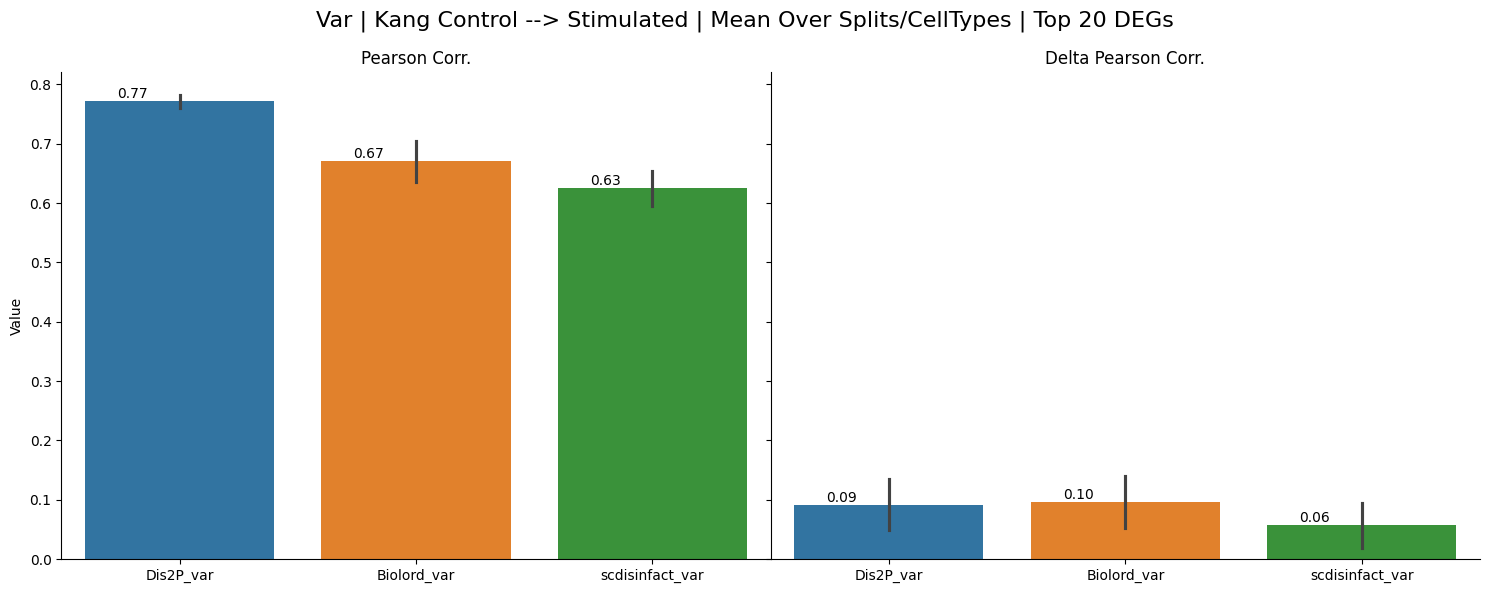

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

GENES = 'all'

df_ax = df_concat[(df_concat['Genes'] == GENES) & (df_concat['Metric'] == 'Pearson')]
sns.barplot(df_ax[['Dis2P_var', 'Biolord_var', 'scdisinfact_var']], ax=axes[0], errorbar='se')
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(
        p.get_x() + p.get_width() / 2 -0.2,  # x coordinate of the text
        height,  # y coordinate of the text
        f'{height:.2f}',  # text to be displayed
        ha='center',  # horizontal alignment
        va='bottom'  # vertical alignment
    )
axes[0].set_title('Pearson Corr.')

df_ax = df_concat[(df_concat['Genes'] == GENES) & (df_concat['Metric'] == 'Delta Pearson')]
sns.barplot(df_ax[['Dis2P_var', 'Biolord_var', 'scdisinfact_var']], ax=axes[1], errorbar='se')
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(
        p.get_x() + p.get_width() / 2 -0.2,  # x coordinate of the text
        height,  # y coordinate of the text
        f'{height:.2f}',  # text to be displayed
        ha='center',  # horizontal alignment
        va='bottom'  # vertical alignment
    )
axes[1].set_title('Delta Pearson Corr.')

# Adding labels and legend
axes[0].set_ylabel('Value')
# axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['right', 'top']].set_visible(False)
# axes[2].spines[['right', 'top']].set_visible(False)

fig.suptitle('Var | Kang Control --> Stimulated | Mean Over Splits/CellTypes | Top 20 DEGs', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)

plt.show()
